# 计算机处理图像的方式和方法

In [3]:
a = [0, 1, 2, 3]

In [4]:
import cv2
import numpy as np
%matplotlib inline

### 直接用生成矩阵的方式生成图片

In [34]:
img0 = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 1]])
img1 = np.array([[[111, 124, 242], [123, 212, 154], [123, 213, 176]],[[151, 164, 162], [223, 221, 254], [223, 113, 76]], [[231, 24, 42], [223, 42, 54], [83, 93, 76]]])
print(img0)
print(img0.shape)

[[0 1 0]
 [0 0 1]
 [1 0 1]]
(3, 3)


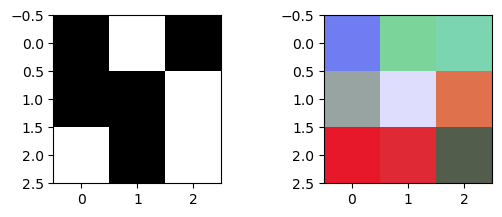

In [38]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.imshow(img0, cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(img1)

### 从彩色图像的颜色空间转换

(1024, 1024, 3)
(1024, 1024)
<class 'numpy.ndarray'>
<built-in method astype of numpy.ndarray object at 0x138d7edb0>
uint8 uint8
uint8


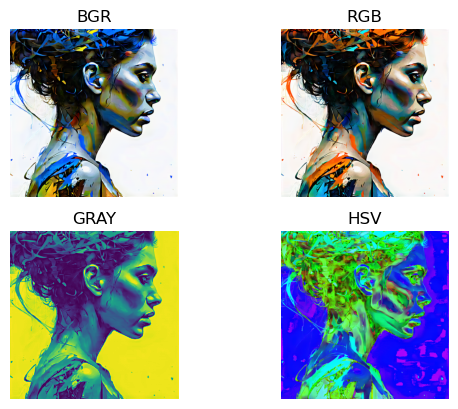

In [7]:
# cv2.imread()接口读图像，读进来直接是BGR 格式数据格式在 0~255，通道格式为(W,H,C)
img_BGR = cv2.imread('./assets/ComfyUI_temp.png')

# 检查图像是否成功读取
if img_BGR is None:
    raise ValueError("图像未能正确读取，请检查文件路径和文件名。")

plt.subplot(2,2,1)
plt.imshow(img_BGR)
plt.axis('off')
plt.title('BGR')
 
 
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.subplot(2,2,2)
plt.imshow(img_RGB)
plt.axis('off')
plt.title('RGB')
 
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
print(img_BGR.shape)
print(img_GRAY.shape)
print(type(img_GRAY))
print(img_GRAY.astype)
 
print(img_GRAY.dtype.name, img_BGR .dtype.name)
 
from skimage import io,data
img=data.chelsea()
print(img.dtype.name)
 
plt.subplot(2,2,3); plt.imshow(img_GRAY);plt.axis('off');plt.title('GRAY')
 
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
plt.subplot(2,2,4); plt.imshow(img_HSV);plt.axis('off');plt.title('HSV')
 
plt.show()

### 从摄像头采集图像

In [8]:
import cv2

# 测试不同的设备编号
for i in range(5):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"摄像头设备编号 {i} 成功打开")
        return_value, frame = cap.read()
        if return_value:
            print(f"设备编号 {i} 读取帧成功")
            cap.release()
            break
        else:
            print(f"设备编号 {i} 无法读取帧")
        cap.release()
    else:
        print(f"摄像头设备编号 {i} 打开失败")

摄像头设备编号 0 成功打开
设备编号 0 读取帧成功


成功打开摄像头
True
读取帧成功
帧的形状: (1080, 1920, 3)


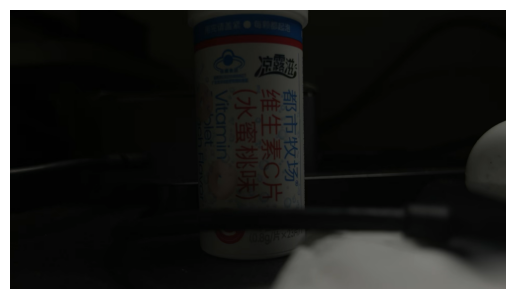

In [15]:
# 打开摄像头
cap = cv2.VideoCapture(0)  # 当前调用设备为 iPhone

if not cap.isOpened():
    print("无法打开摄像头")
else:
    print("成功打开摄像头")
    # 读取一帧
    return_value, frame = cap.read()
    print(return_value)
    if return_value:
        print("读取帧成功")
        print("帧的形状:", frame.shape)
        # 显示图像
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("无法读取帧")

    # 释放摄像头
    cap.release()
    cv2.destroyAllWindows()

### 从视频文件获取视频帧

成功读取视频文件
读取帧成功
True
帧的形状: (1080, 1920, 3)


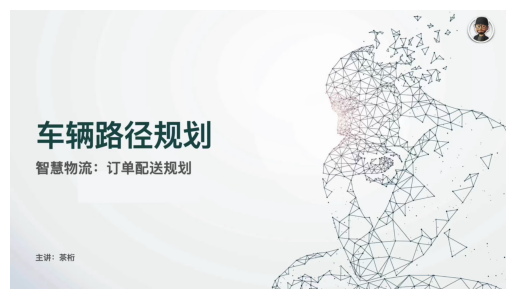

In [16]:
# 读取本地视频帧
cap = cv2.VideoCapture('./assets/VRP_2_14.mov')

if not cap.isOpened():
    print("无法读取视频文件")
else:
    print("成功读取视频文件")
    # 读取一帧
    return_value, frame = cap.read()
    if return_value:
        print("读取帧成功")
        print(return_value)
        print("帧的形状:", frame.shape)
        # 显示图像
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print("无法读取帧")

    # 释放摄像头
    cap.release()
    cv2.destroyAllWindows()

True
True
(1080, 1920, 3)
4
4


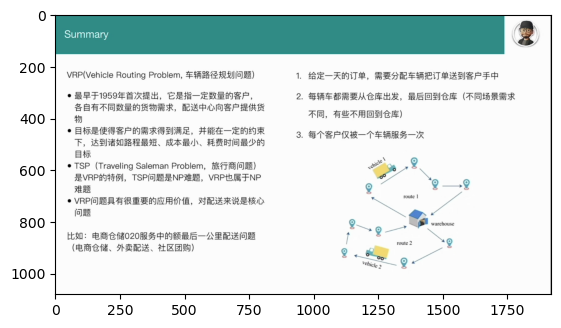

In [20]:
# 读取本地视频帧
cap = cv2.VideoCapture('./assets/VRP_2_14.mov')

print(cap.isOpened())
for i in range(501):
  return_value, frame = cap.read()
print(return_value)
print(frame.shape)
print(cv2.COLOR_BGR2RGB)
print(cv2.COLOR_RGB2BGR)

plt.imshow(cv2.cvtColor(frame, 4))

(1024, 1024, 3)


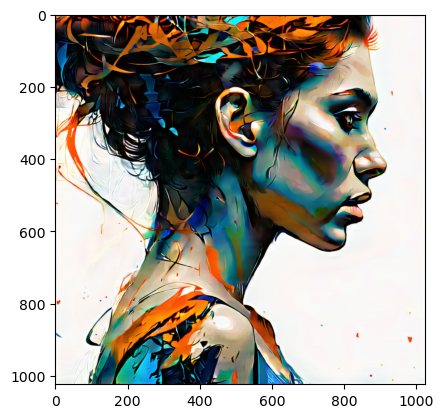

In [25]:
# 将转换方法改为序号
img_BGR = cv2.imread('./assets/ComfyUI_temp.png')

# 检查图像是否成功读取
if img_BGR is None:
    raise ValueError("图像未能正确读取，请检查文件路径和文件名。")
 
img_RGB = cv2.cvtColor(img_BGR, 4)
print(img_RGB.shape)
plt.imshow(img_RGB)

(800, 500, 3)


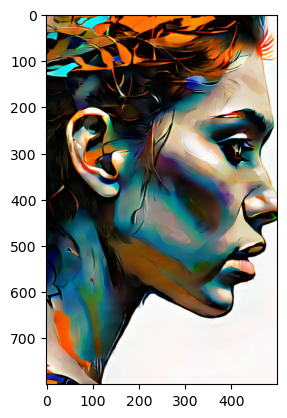

In [31]:
# region of instrest
roi = img_RGB[0:800, 400:900]
print(roi.shape)
plt.imshow(roi)